In [221]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import random
import sys
import time
% matplotlib inline

In [5]:
# define game
# apply action on game
# check if finished

In [60]:
# define game board
size = (6, 7)
game = np.zeros(size)

In [80]:
# apply action on game
def apply_action(game, player, action):
    """
    'game': np.array: the current board
    'action': int, the column to be played (0 to N)
    'player': int, 1 or 2"""
    
    for i in range(game.shape[0]):
        if game[i, action] != 0:
            continue
        game[i, action] = player
        return game
    return False  # false action, the column is full

In [161]:
def check_line(line, player):
    #idx = np.where(line==player)
    count = 0
    target = 4
    for i in range(len(line)):
        if line[i] == player:
            count+=1
        else:
            count=0
        if count>=target:
            return True
    return False

In [162]:
def is_won(game, player):
    target = 4
    # check columns
    for col in game.T:
        if check_line(col, player):
            return True
    # check lines
    for line in game:
        if check_line(line, player):
            return True
    # check diagonals
    for i in range(game.shape[0]-target+1):
        for j in range(game.shape[1]-target+1):
            if check_line(np.diag(game[i:i+target, j:j+target]), player):
                return True
            if check_line(np.diag(np.flip(game[i:i+target, j:j+target], 0)), player):
                return True
    return False

In [245]:
def choose_action(game, q_table, method='rand'):
    if method=='rand':
        return random.randint(0, 6)

In [258]:
def is_finished(game):
    return not (game==0).any()

In [268]:
def play_game(size):
    
    # init game
    game = np.zeros(size)
    
    with open('/data/game/connect4_q_table.pkl', 'rb') as pklfile:
        q_table = pickle.load(pklfile)
    q_table_1 = q_table
    q_table_2 = q_table
    
    while not is_finished(game):
        # player 1
        action_1 = choose_action(game, q_table_1)
        res = False
        while res is False:
            res = apply_action(game, 1, action_1)
        game = res   
        
        if is_won(game, 1):
            print('Player 1 (white) won !')
            plt.pcolor(game, linewidths=2, edgecolors='k', cmap='bwr')
            return
        
        # player 2
        action_2 = choose_action(game, q_table_2)
        res = False
        while res is False:
            res = apply_action(game, 2, action_2)
        game = res
        
        if is_won(game, 2):
            print('Player 2 (red) won !')
            plt.pcolor(game, linewidths=2, edgecolors='k', cmap='bwr')
            return
    print('draw')
    plt.pcolor(game, linewidths=2, edgecolors='k', cmap='bwr')

False

Player 2 (red) won !


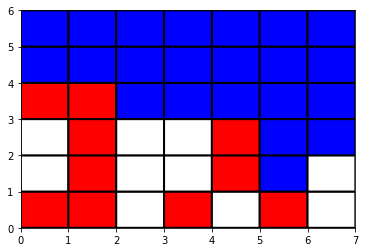

In [275]:
play_game((6, 7))

player 2 won


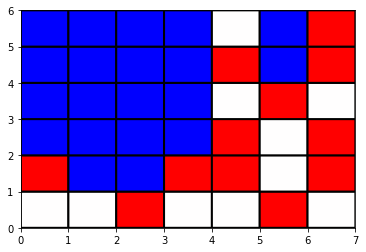

In [159]:
if apply_action(game, 2, 5) is False:
    print('error, column full')
else:
    plt.pcolor(game, linewidths=2, edgecolors='k', cmap='bwr')
if is_won(game, 1):
    print('player 1 won')
if is_won(game, 2):
    print('player 2 won')

In [160]:
game[3, 5] = 1

# build q table

In [240]:
size = (6, 7)
nbr_move = size[0]*size[1]
q_table = np.expand_dims(np.zeros(size), 0) # init with empty game
new_game= np.zeros(size)

In [236]:
def game_in_q(q, game):
    for g in q:
        if np.equal(g, game).all():
            return True
    return False    

In [239]:

if new_game is False:
    print('yay')

In [244]:
for i in range(100000000):
    res = apply_action(new_game, i%2+1, random.randint(0, 6))
    
    if res is False:
        continue
    new_game = res
    
    if is_won(new_game, 1) or is_won(new_game, 2):
        new_game = np.zeros(size)
        
    if not game_in_q(q_table, new_game):
        q_table = np.append(q_table, np.expand_dims(new_game, 0), axis=0)
print(q_table.shape)

(6921, 6, 7)


In [242]:
saved_q_table = q_table

In [243]:
saved_q_table.shape 

(6921, 6, 7)

In [203]:
game_in_q(q_table, np.zeros(size))

True

In [247]:
import pickle

In [252]:
with open('/data/game/connect4_q_table.pkl', 'br') as pklfile:
    a = pickle.load(pklfile)
print(a.shape)

(6921, 6, 7)
